In [1]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install tqdm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:

pip install --upgrade opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_path = 'Dataset/TRAIN'
test_path = 'Dataset/TEST'


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob





2025-01-24 11:05:07.883378: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 11:05:08.138252: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 11:05:08.375511: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737696908.629532    4678 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737696908.688478    4678 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 11:05:09.224769: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [ ]:
import os

x_data=[]
y_data=[]
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')  # Add other supported formats as needed


for category in glob(train_path+'/*'):
 for file in tqdm(glob(category + '/*')):
    if file.lower().endswith(valid_extensions):
        img_array = cv2.imread(file)
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            x_data.append(img_array)
            y_data.append(category.split('/')[-1])


data=pd.DataFrame({'image':x_data,'label':y_data})
        
    


100%|██████████| 12565/12565 [00:25<00:00, 496.54it/s]


In [11]:
data.shape

(22484, 2)

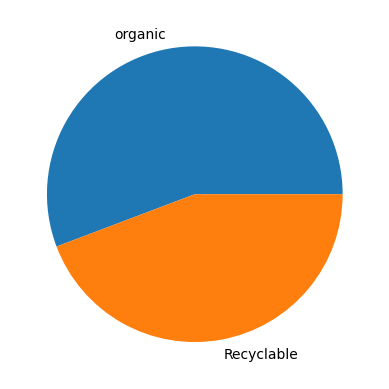

In [12]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','Recyclable'])
plt.show()

label
O    12537
R     9947
Name: count, dtype: int64
['O', 'R']


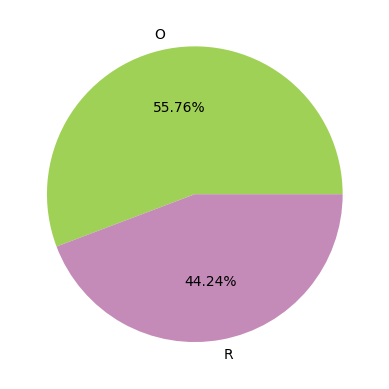

In [14]:
import matplotlib.pyplot as plt

# Get the value counts for the labels
label_counts = data['label'].value_counts()
print(label_counts)

# Use the unique labels dynamically instead of hardcoding
labels = label_counts.index.tolist()
print(labels)
# Plot the pie chart
plt.pie(label_counts, labels=labels, colors=['#a0d157','#c48bb8'],autopct='%0.2f%%', )
plt.show()


In [15]:
print(f"Total images processed: {len(x_data)}")
print(f"Categories found: {set(y_data)}")


Total images processed: 22484
Categories found: {'R', 'O'}
